In [1]:
import torch
import torch.nn as nn

from src.data import Dataset
from src.models import Discrimator, Generator
from src.visualization import imshow


Dataset generation for the sake of this notebook. It should be substituted with DVC.

In [2]:
#import pandas as pd
#pd.read_csv('data/list_attr_celeba.csv').image_id.head(20000).to_csv('data/dataset.csv')

In [3]:
dataset = Dataset()
dataloader = torch.utils.data.DataLoader(dataset)

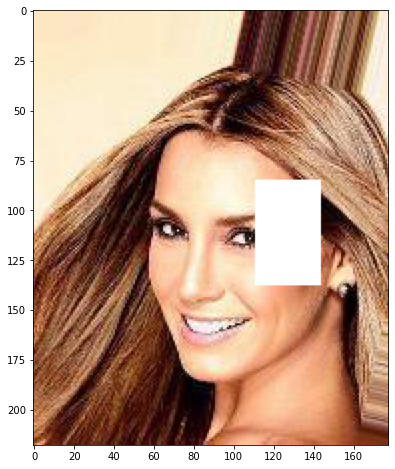

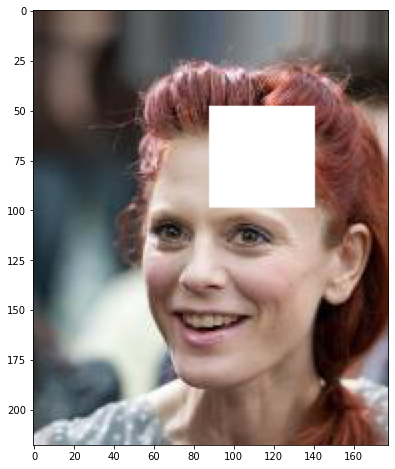

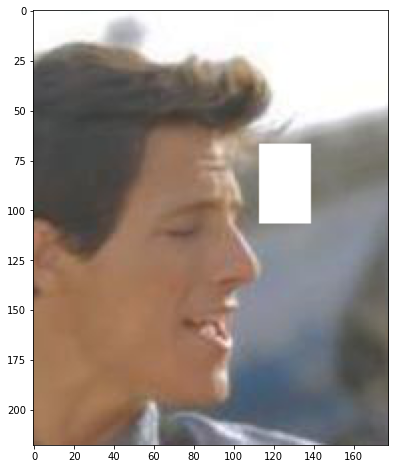

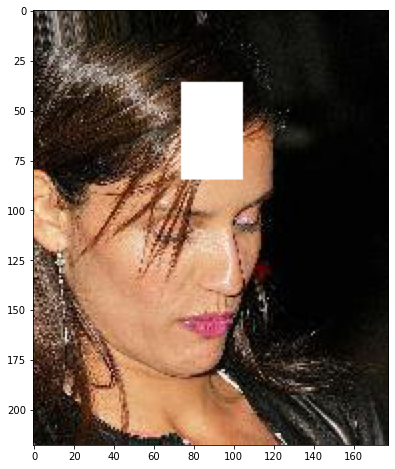

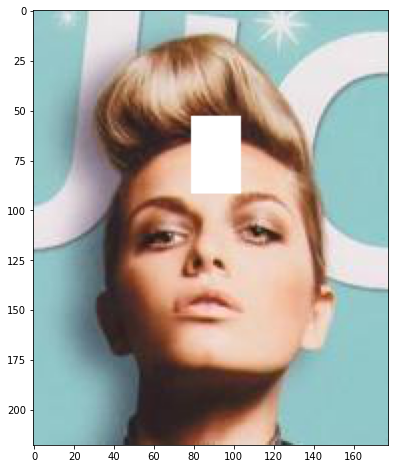

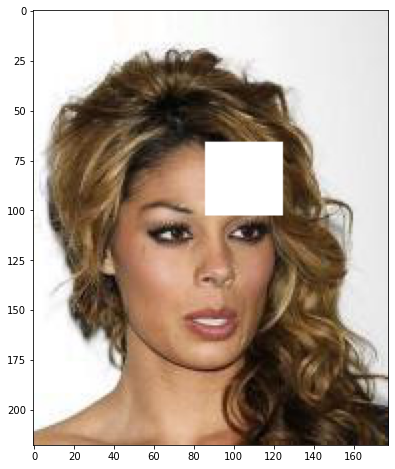

In [4]:
for i, e in enumerate(dataloader):
    imshow(e[0].detach().cpu().numpy())
    if i == 5: break

In [5]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
#netG = Generator()
#netD = Discrimator()
#
#netG.to(device=device)
#netD.to(device=device)

In [7]:
#lr = 1e-3
#epochs = 1000
#batch_size = 32

In [8]:
#dataset = Dataset()
#dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [9]:
#criterion = nn.BCELoss() 
#optimizerG = nn.optim.Adam(netG.parameters(), lr=lr)
#optimizerD = nn.optim.Adam(netD.parameters(), lr=lr)

In [10]:
#for e in range(epochs):
#    for i, data in enumerate(dataloader):
#        #fitting
        